### Hello!! Making this to display some introductions to Geospatial Python!

Hello everybody - This is a python environment called Jupyter Notebooks. Today I will show you how to get your own Jupyter Notebook up and running and get started doing some geospatial analysis :)

#### Step one - Imports

These packages are range from useful to essential for geospatial analysis

#### Packages needed

"pip install ______"

 - pandas
 - geopandas
 - matplotlib
 - h3pandas
 - contextily
 - censusdis

In [1]:
## for basic numeric processing
import pandas as pd

## geospatial version of pandas 
import geopandas as gpd

### matplot lib for static mapping/graphmaking
import matplotlib
import matplotlib.pyplot as plt

#import h3
import h3pandas

### to add basemap to static maps
import contextily as cx


pd.set_option('display.max_columns', None) ### This line makes all the columns display, rather than ellipses shorten

In [2]:
### Now import the data

amanita_frame = pd.read_csv("C:/Users/aaron/Fun Mapping Work/Data/Maptime_Tutorial_Data/Mushroom_Folder/Amanita_in_Washington.csv")

In [3]:
### This line is to create a counting column so that the hexagons can be aggregated later... there may be a better way to do this.
amanita_frame['quantity'] = 1

In [4]:
### look at the first five rows
amanita_frame.head()

id                                  uuid observed_on_string observed_on  \
0  39357  1c931a39-16ed-449c-8933-6c9435310e55         2011-10-31  2011-10-31   
1  71757  c71b3d1f-fd61-46fa-95b5-8ca3a6e74817         2012-04-24  2012-04-24   
2  72839  95fa8977-d77e-4ff4-9c8d-e0b4bf64f3a9         2012-04-30  2012-04-30   
3  73175  66e86356-560d-451a-901f-b27477259fa1         2012-04-24  2012-04-24   
4  78633  e9e2dbae-e373-45fe-b34b-3b057fb8d33a         2012-05-10  2012-05-10   

  time_observed_at                   time_zone  user_id       user_login  \
0              NaN  Pacific Time (US & Canada)     3678  noellemachnicki   
1              NaN  Pacific Time (US & Canada)     5777     karavanslyck   
2              NaN                     Tijuana     4304            mossy   
3              NaN  Pacific Time (US & Canada)     5667         keenan44   
4              NaN  Pacific Time (US & Canada)     5539         ajwick24   

          user_name                 created_at                 updated_at  \
0  Noelle Machnicki  2011-11-18 02:35:09 +0100  2023-04-09 05:43:44 +0200   
1    Kara Van Slyck  2012-04-29 19:19:24 +0200  2025-07-23 23:55:14 +0200   
2               NaN  2012-05-01 04:57:31 +0200  2017-05-23 03:16:42 +0200   
3               NaN  2012-05-01 16:38:56 +0200  2025-07-23 23:57:43 +0200   
4               NaN  2012-05-14 05:09:15 +0200  2025-03-13 18:33:45 +0100   

  quality_grade                                            url  \
0      research  http://www.inaturalist.org/observations/39357   
1      research  http://www.inaturalist.org/observations/71757   
2      research  http://www.inaturalist.org/observations/72839   
3      needs_id  http://www.inaturalist.org/observations/73175   
4      needs_id  http://www.inaturalist.org/observations/78633   

                                           image_url tag_list  \
0  https://static.inaturalist.org/photos/65503/me...    Fungi   
1  https://static.inaturalist.org/photos/108023/m...      NaN   
2  https://static.inaturalist.org/photos/109449/m...      NaN   
3  https://static.inaturalist.org/photos/109951/m...      NaN   
4  https://static.inaturalist.org/photos/116237/m...      NaN   

                                         description  \
0  This species was very abundant under shore pin...   
1  This type of mushroom was found slightly off t...   
2  The slugs were chowing down on these Amanita f...   
3  Seen in the yard of a U-District resident on 5...   
4  We found this hallucinogenic mushroom in front...   

   num_identification_agreements  num_identification_disagreements  \
0                              4                                 0   
1                              2                                 0   
2                              1                                 0   
3                              4                                 0   
4                              6                                 1   

   captive_cultivated                   place_guess   latitude   longitude  \
0               False     Ocean City State Park, WA  47.026493 -124.168167   
1               False              Ravenna Park, Wa  47.671542 -122.303767   
2               False          ensign road, Olympia  47.051008 -122.845383   
3               False  University District, Seattle  47.668612 -122.310622   
4               False                            UW  47.657800 -122.308517   

   positional_accuracy  private_place_guess  private_latitude  \
0                  NaN                  NaN               NaN   
1                878.0                  NaN               NaN   
2                759.0                  NaN               NaN   
3                  NaN                  NaN               NaN   
4                  NaN                  NaN               NaN   

   private_longitude  public_positional_accuracy geoprivacy taxon_geoprivacy  \
0                NaN                         NaN        NaN              NaN   
1                NaN             

In [5]:
## grab all types of mushrooms in the dataset
#amanita_frame.common_name.value_counts()

### Making a GeoDataFrame

In [6]:
### important line here ------> turn the mushroom DataFrame into a GeoDataFrame!

amanita_geodataframe = gpd.GeoDataFrame(amanita_frame, geometry = gpd.points_from_xy(amanita_frame.longitude, amanita_frame.latitude), crs = "EPSG:4326")

In [7]:
## take a look at where all the mushrooms are and see how cool gdf.explore is
#amanita_geodataframe.explore()

In [8]:
### invoke H3 and make a hexagon data frame!!

hex_frame_wa_state = amanita_geodataframe.h3.geo_to_h3_aggregate(5)

In [9]:
## add a tooltip for the interactive map

tt = {'quantity'}

In [10]:
#hex_frame_wa_state.explore(column = 'quantity', tooltip = tt)

### Add a King county boundary

In [11]:
#### Use the censusdis package to grab a King County boundary

### Census Dis Tutorial --> https://github.com/censusdis/censusdis-tutorial-2024

import censusdis.data as ced
from censusdis.datasets import ACS5
import censusdis.states as states

from censusdis.counties.washington import KING

In [12]:
### grabbing the king county boundary in the form of a GeoDataFrame using the censusdis package
### using the 'download_variables' parameter you can easily access tons of census data.

king_county_boundary_frame = ced.download(
    dataset=ACS5,
    vintage=2020,
    download_variables=["NAME"],
    state=states.WA,
    county=KING,
    # We want the geometry of the states too:
    with_geometry=True,
)

In [13]:
### preparing a spatial join
king_county_boundary_frame = king_county_boundary_frame.to_crs(4326)

In [14]:
### Using spatial join to make a king county *only* amanita frame

amanita_in_king_county_GDF = gpd.sjoin(amanita_geodataframe, king_county_boundary_frame, how = 'inner', predicate = 'intersects')

In [15]:
#amanita_in_king_county_GDF.head()
#amanita_in_king_county_GDF.explore()

In [16]:
## making the hexagons!

hex_frame_kingco = amanita_in_king_county_GDF.h3.geo_to_h3_aggregate(7, operation = 'sum')

In [17]:
hex_frame_kingco.explore(column = 'quantity', tooltip = tt)

### Making a static map

Text(0.5, 1.0, 'Washington State Amanita Reports')

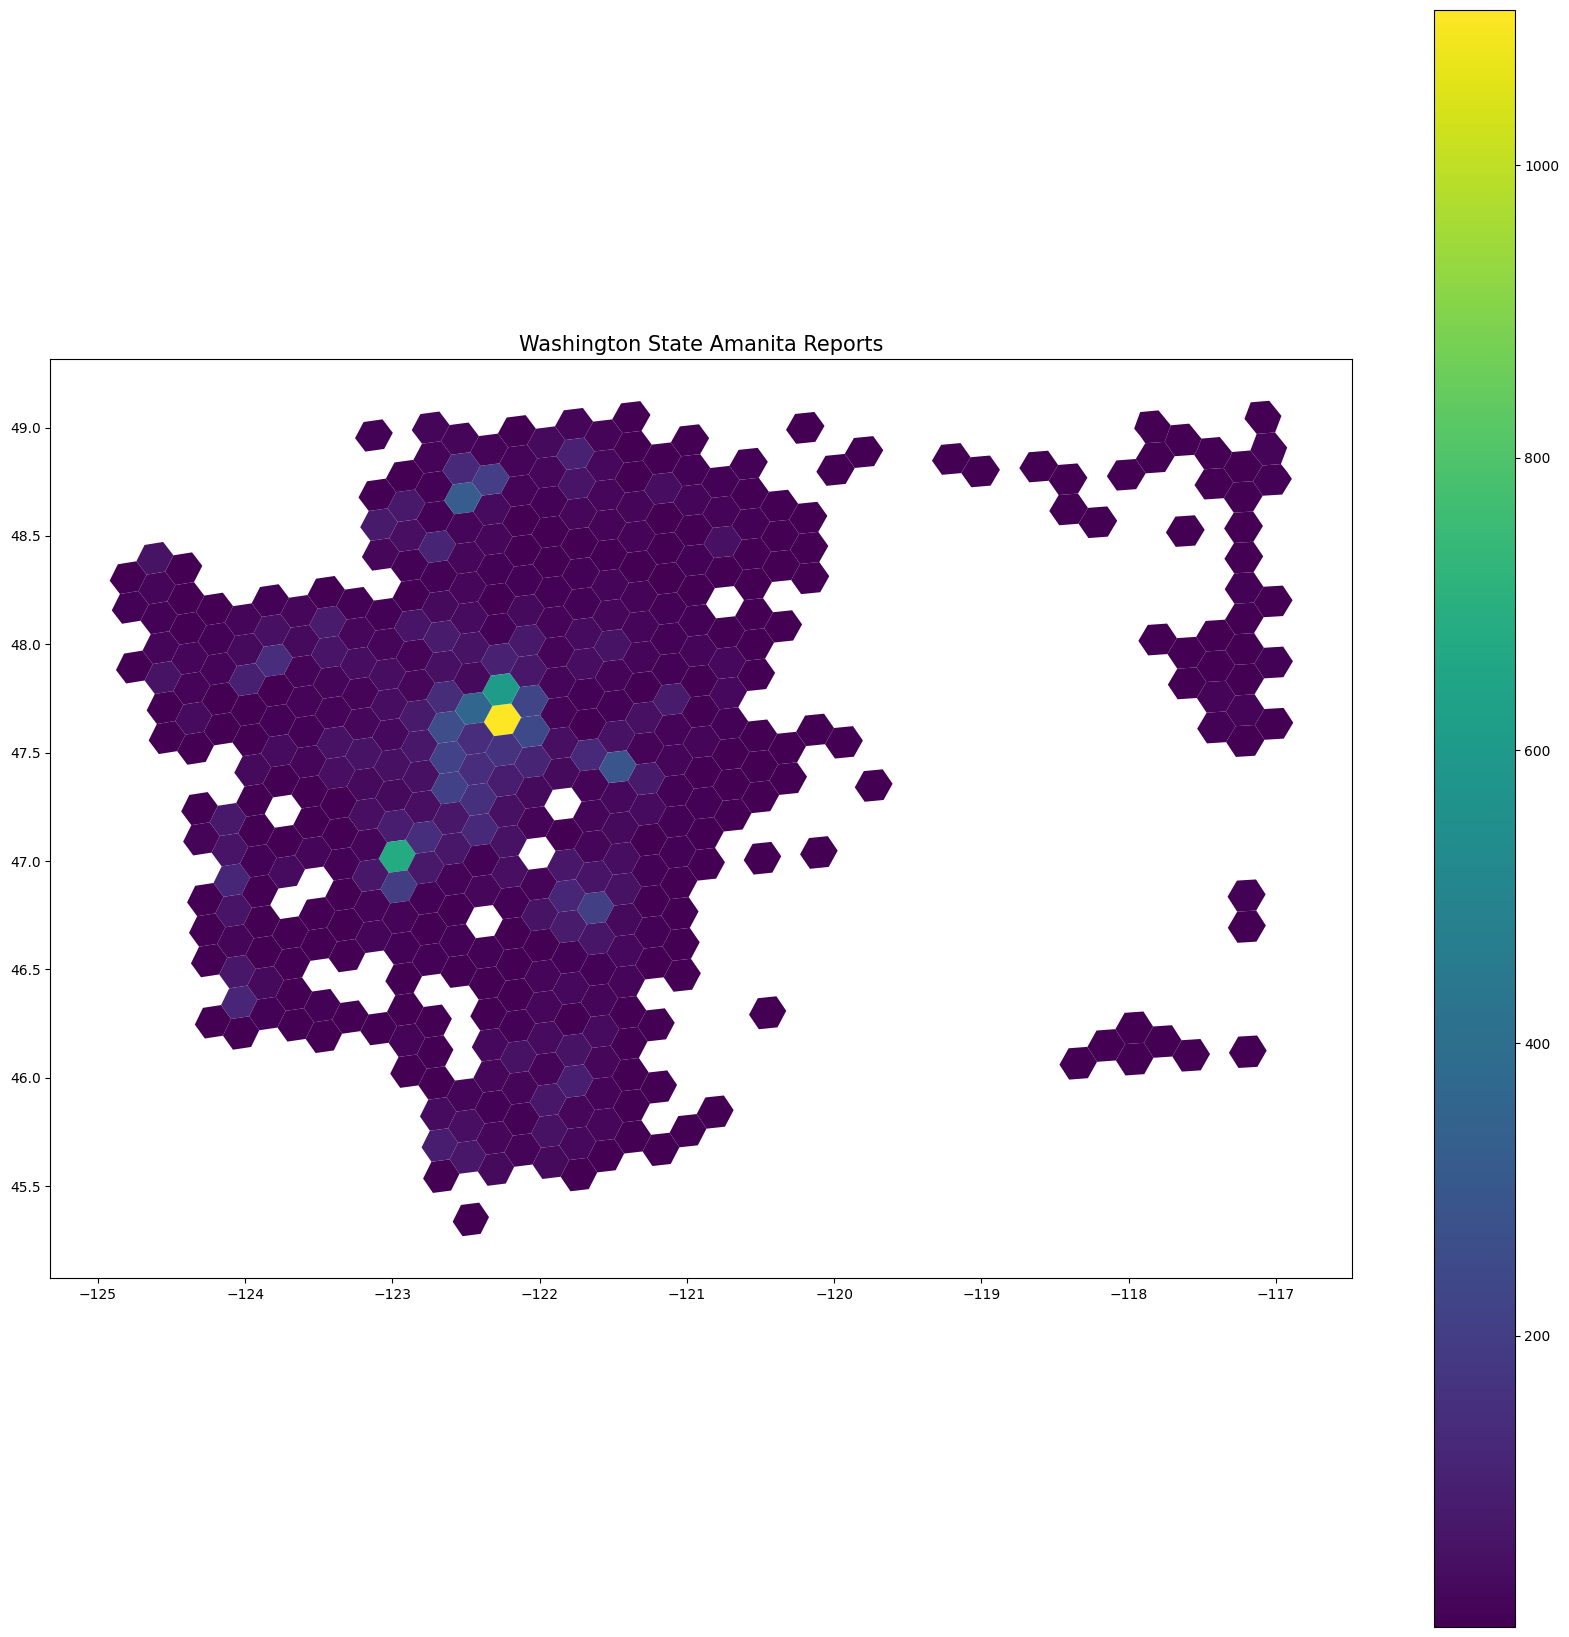

In [18]:
fig, ax = plt.subplots(figsize  = (21, 21))

hex_frame_wa_state.plot(
                column = 'quantity',
                legend = True,
                ax = ax)

ax.set_title("Washington State Amanita Reports", fontsize=15)

### Now adding a basemap

In [19]:
max_shrooms_in_hex = hex_frame_kingco.quantity.max()

Text(0.5, 1.0, 'King County Amanita Reports')

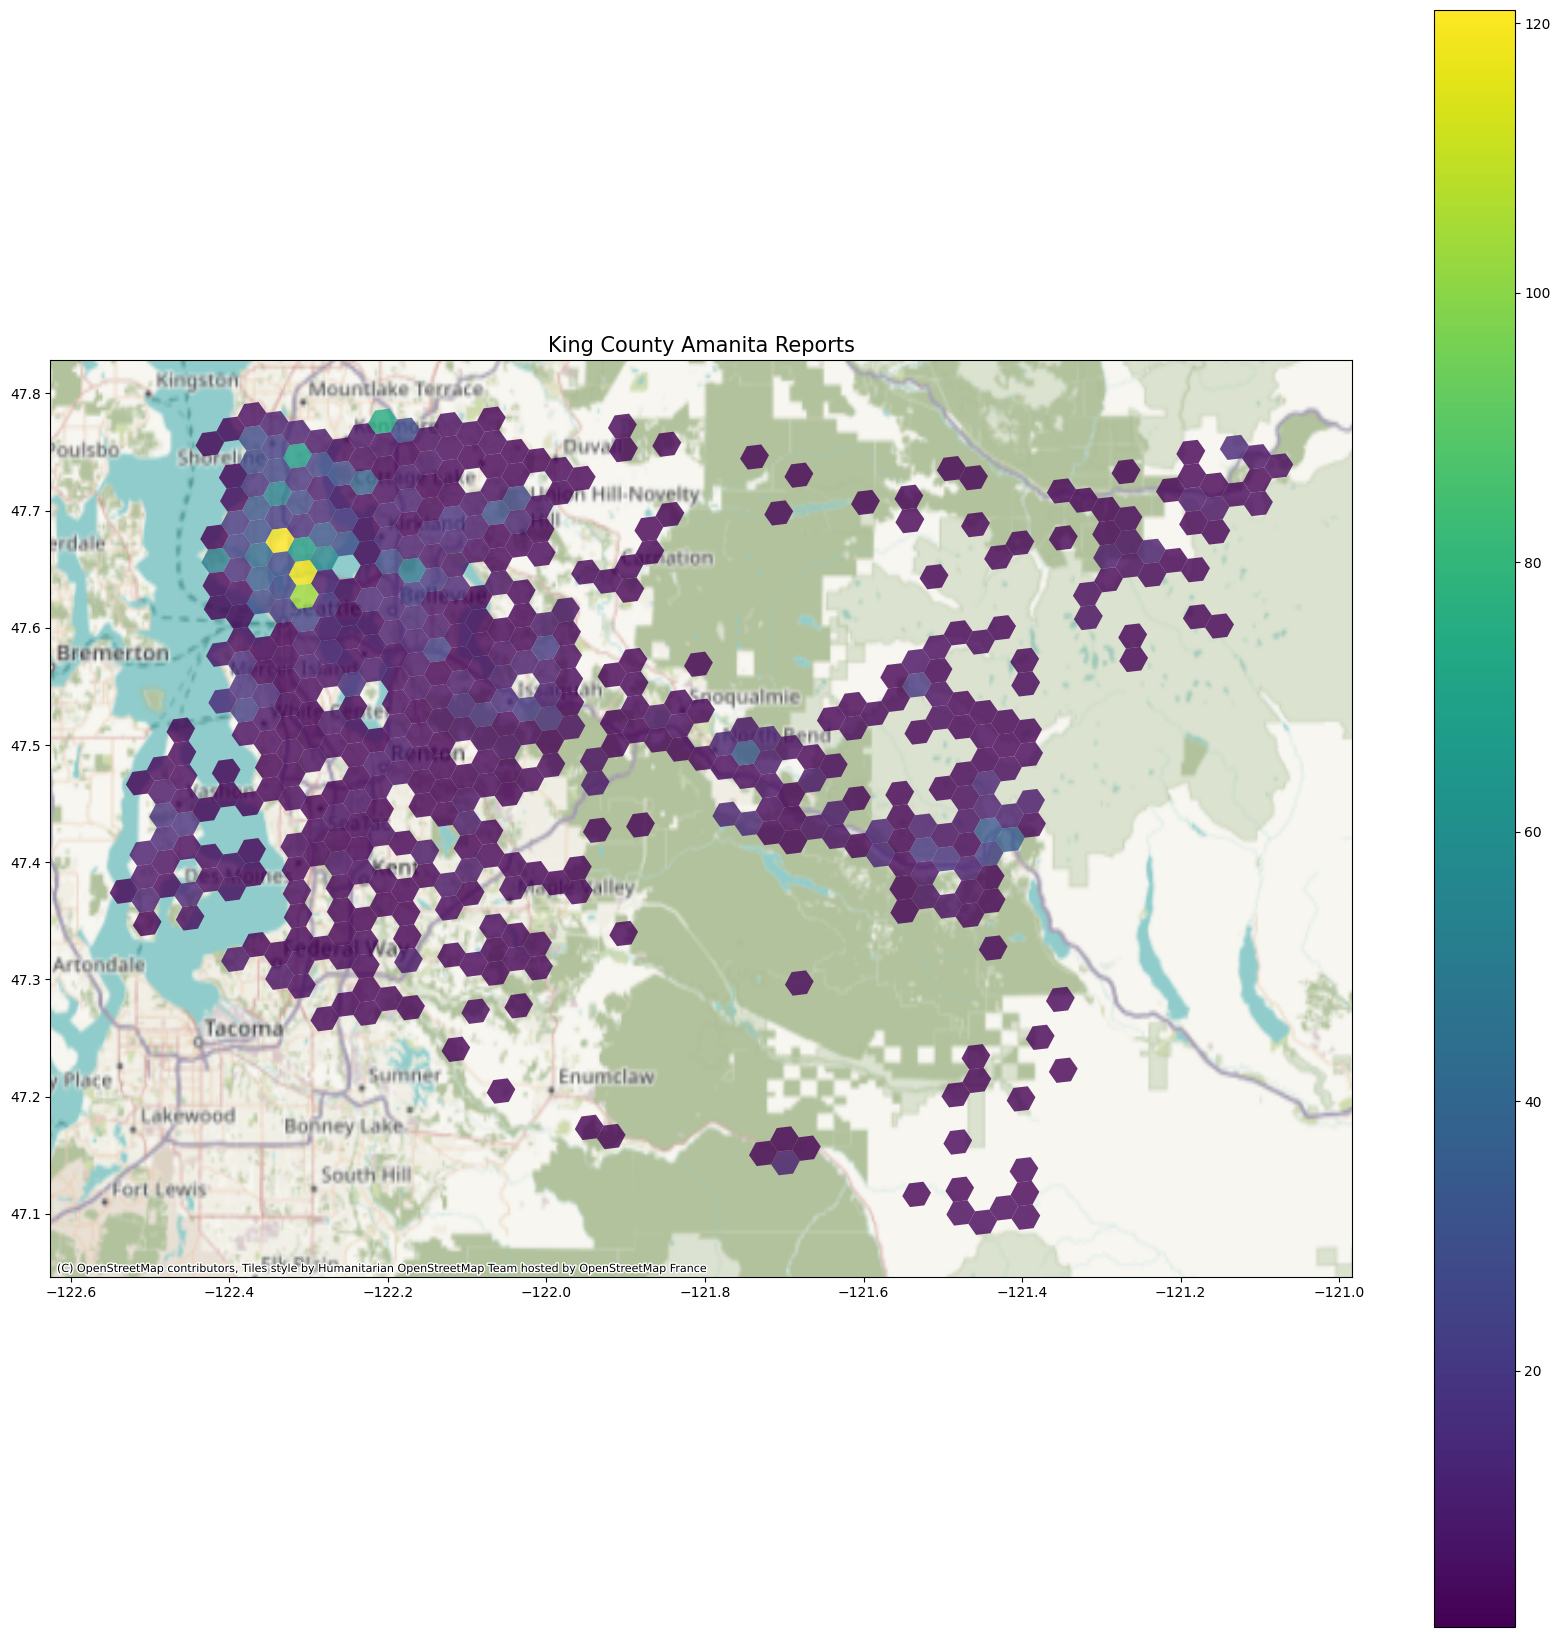

In [20]:
fig, ax = plt.subplots(figsize  = (21, 21))

hex_frame_kingco.plot(
                column = 'quantity',
                legend = True,
                alpha = 0.8,
                #norm=matplotlib.colors.LogNorm(vmin = 0.01, vmax = max_shrooms_in_hex), #add this line to normalize the scale
                ax = ax)

cx.add_basemap(ax, crs=hex_frame_kingco.crs)

ax.set_title("King County Amanita Reports", fontsize=15)

